# This is where we import the required libraries

In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading the dataset

In [53]:
dataset_df = pd.read_csv('train.csv')
dataset_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Exploratory data analysis

In [56]:
dataset_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [58]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: xlabel='Transported'>

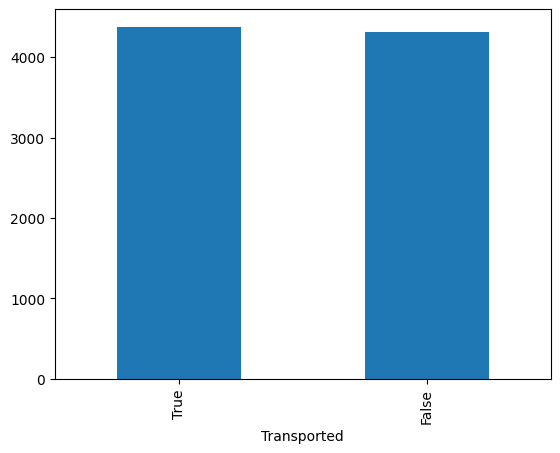

In [60]:
bar_chart = dataset_df.Transported.value_counts()
bar_chart.plot(kind = 'bar')

# Prepare the dataset
## We will drop the name as it is not nessary

In [63]:
dataset_df = dataset_df.drop(['Name', 'PassengerId'], axis = 1)
dataset_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [65]:
dataset_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

### This is whare we replace the missing values with zero, if we were to replace them with any other value it would have created a bias

In [68]:
dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value = 0)


dataset_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### Here we will convert boolean values into int as TFDF cannot handle bool values

In [71]:
label = 'Transported'
dataset_df['VIP'] = dataset_df['VIP'].astype(int)
dataset_df['CryoSleep'] = dataset_df['CryoSleep'].astype(int)
dataset_df[label] = dataset_df[label].astype(int)

### Since cabin is a f**king ass column it needs to be divided into 3 different columns

In [74]:
dataset_df[["Deck", "Cabin_num", "Side"]] = dataset_df["Cabin"].str.split("/", expand=True)

In [104]:
try:
    dataset_df = dataset_df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

Field does not exist


### The dataset needs to be split into test and train

In [83]:
train, test = train_test_split(dataset_df, test_size=0.2, random_state=42)

### pd dataframes cannot be fed into tensorflow so we need to convert them into tensorflow datasets to be fed.
### Only Transported column is not fed as it is the target column

In [86]:
train = tfdf.keras.pd_dataframe_to_tf_dataset(train, label = label)
test = tfdf.keras.pd_dataframe_to_tf_dataset(test, label = label)

In [87]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

# Sellecting a model
## We will use RandomForestModel
### We have not used GradientBoostedTreesModel because it takes up too much time although it has better results
### We will not use CartModel because it is too unstable
### We will not use DistributedGradientBoostedTreesModel because it is too big and a overkill
I dont know why working_dir is not working as i have already updated tfdf to the latest version

In [116]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics = ['accuracy'])

Use /var/folders/sl/n278hvbs1xv__mbd905qvlcm0000gn/T/tmpm5g9up0o as temporary training directory


In [118]:
rf.fit(x = train)

Reading training dataset...
Training dataset read in 0:00:00.138132. Found 6954 examples.
Training model...


I0000 00:00:1759549304.860986  497624 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1759549304.861018  497624 kernel.cc:783] Collect training examples
I0000 00:00:1759549304.861052  497624 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1759549304.861193  497624 kernel.cc:401] Number of batches: 7
I0000 00:00:1759549304.861198  497624 kernel.cc:402] Number of examples: 6954
I0000 00:00:1759549304.863326  497624 data_spec_inference.cc:354] 5394 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Cabin (47 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:17595

Model trained in 0:00:13.508678
Compiling model...
Model compiled.


I0000 00:00:1759549318.349580  497624 decision_forest.cc:808] Model loaded with 300 root(s), 229166 node(s), and 14 input feature(s).
I0000 00:00:1759549318.349613  497624 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-10-04 09:11:58.349628: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


In [119]:
inspection = rf.make_inspector()
inspection.evaluation()

Evaluation(num_examples=6954, accuracy=0.7988208225481737, loss=0.553107456828253, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [120]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=4)  # here we have only displayed 4 depth of tree for better visualisation

In [121]:
evaluation = rf.evaluate(x = test, return_dict = True)

2/2 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.7970


### some visualisation of the model

In [98]:
for name, value in evaluation.items():
    print(f"{name} : {value:.4f}")

loss : 0.0000
accuracy : 0.7970


In [127]:
for f in rf.make_inspector().features():
    print(f.name)


Age
Cabin
Cabin_num
CryoSleep
Deck
Destination
FoodCourt
HomePlanet
RoomService
ShoppingMall
Side
Spa
VIP
VRDeck


In [99]:
for importance in inspection.variable_importances().keys():
    print("\t", importance)

	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [129]:
# Load the test dataset
test_df = pd.read_csv('test.csv')
submission_id = test_df.PassengerId

# Replace NaN values with zero
test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)

# Creating New Features - Deck, Cabin_num and Side from the column Cabin and remove Cabin and remove Name and PassengerId
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)

test_df = test_df.drop(columns = ['PassengerId', 'Name'], axis = 1)
# Convert boolean to 1's and 0's
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

# Convert pd dataframe to tf dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# Get the predictions for testdata
predictions = rf.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

5/5 [==============================] - 0s 34ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [133]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
